In [45]:
import numpy as np
import random

from collections import defaultdict
from typing import Dict, List, Optional
import matplotlib.pyplot as plt

import networkx as nx

In [46]:
N = 100
M = 200

In [47]:
m = np.zeros((N, N))

for _ in range(M):
    while True:
        i = random.randint(0, N - 1)
        j = random.randint(0, N - 1)
        if i != j and m[i][j] == 0:
            m[i][j] = m[j][i] = 1
            break
m

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [48]:
d = {v: [] for v in range(N)}

for i in range(N):
    for j in range(N):
        if m[i][j] == 1:
            d[i].append(j)

d

{0: [],
 1: [13, 39, 88],
 2: [12, 14],
 3: [12, 20, 34, 81],
 4: [30, 35, 46, 69, 76],
 5: [7, 35, 83],
 6: [8, 11, 32, 65, 73, 88],
 7: [5, 25, 44, 71],
 8: [6, 12, 17, 31, 70, 84],
 9: [73, 93],
 10: [38, 63, 79],
 11: [6, 30, 34, 46, 51, 62, 70],
 12: [2, 3, 8, 45, 58, 72, 92],
 13: [1, 37, 80],
 14: [2, 96],
 15: [36, 63, 86],
 16: [31, 59, 69],
 17: [8, 38, 77, 87],
 18: [71, 89],
 19: [56, 57, 68, 98],
 20: [3, 24, 40, 54, 59, 62],
 21: [51, 59],
 22: [24, 29, 51, 75, 80, 85, 91],
 23: [40, 59, 73, 77, 93, 97],
 24: [20, 22, 50, 83, 92],
 25: [7, 84],
 26: [44, 47, 99],
 27: [70, 92],
 28: [44, 53, 79],
 29: [22, 50, 68, 72, 86, 92],
 30: [4, 11, 58],
 31: [8, 16, 86, 91, 97],
 32: [6, 75],
 33: [41, 49, 72, 75, 96],
 34: [3, 11, 45, 83],
 35: [4, 5, 44],
 36: [15, 51, 86],
 37: [13, 41, 67],
 38: [10, 17, 42, 78],
 39: [1, 43, 48, 55, 72, 83],
 40: [20, 23, 66],
 41: [33, 37, 57, 66, 82],
 42: [38, 47, 49, 59],
 43: [39, 53, 85],
 44: [7, 26, 28, 35, 51, 56, 60, 86, 90],
 45: [

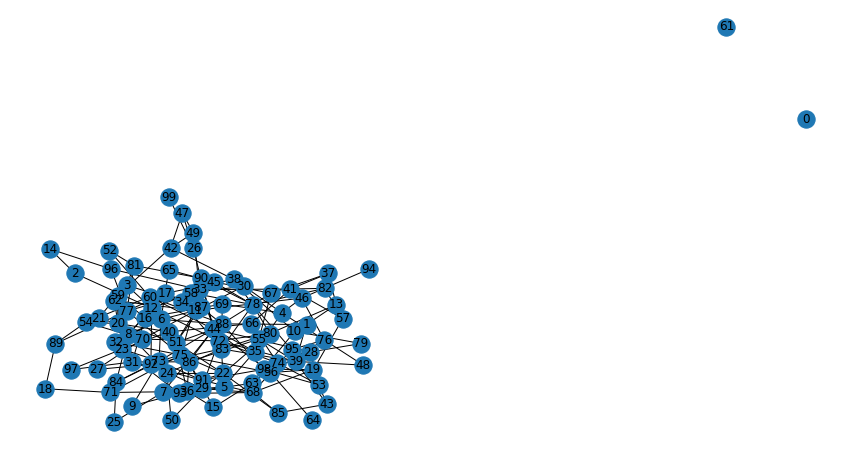

In [49]:
g = nx.Graph(d)

fig, ax = plt.subplots(figsize=(15,8))

nx.draw(g, with_labels=True)

In [50]:
def shortest_path(g: Dict[int, List[int]], i: int, j: int) -> Optional[List[int]]:
    queue = [j]

    parent = [None] * N
    parent[j] = j
    
    while len(queue) != 0 and parent[i] is None:
        v = queue.pop(0)
        for u in g[v]:
            if parent[u] is None:
                queue.append(u) 
                parent[u] = v
                
    if parent[i] is None:
        return None
    
    path = [i]
    while j != i:
        i = parent[i]
        path.append(i)
    return path

In [51]:
i, j = random.randint(0, N - 1), random.randint(0, N - 1)
path = shortest_path(d, i, j)
print(f'shortest_path {i}->{j}: {path}')

shortest_path 21->25: [21, 51, 44, 7, 25]


In [52]:
def connected_components(g: Dict[int, List[int]]) -> List[List[int]]:
    component = [0] * N
    k = 0
    
    for i in range(N):
        if component[i] == 0:
            k += 1
            component[i] = k
            stack = [i]
            
            while len(stack) > 0:
                v = stack.pop()
                
                for u in g[v]:
                    if component[u] == 0:
                        component[u] = k
                        stack.append(u)

    c = [[] for _ in range(k)]
    for i in range(N):
        c[component[i] - 1].append(i)
    return c

In [53]:
c = connected_components(d)
print(f'found {len(c)} components:')
print(*connected_components(d), sep='\n')

found 3 components:
[0]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
[61]
